In [133]:
import pandas as pd
import numpy as np
import math as mp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 


In [134]:
#Breakdown the data into chunks, preprocess and store each chunk in the list defined below
cit_chunk_list = []  
#Define chunksize
chunksize = 10 ** 4
for chunk in pd.read_csv("Parking_Citations2004_2014.csv", chunksize=chunksize, low_memory=True):
        cit_chunk_list.append(chunk)

cit_Year=pd.concat(cit_chunk_list)

/home/ndugnel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


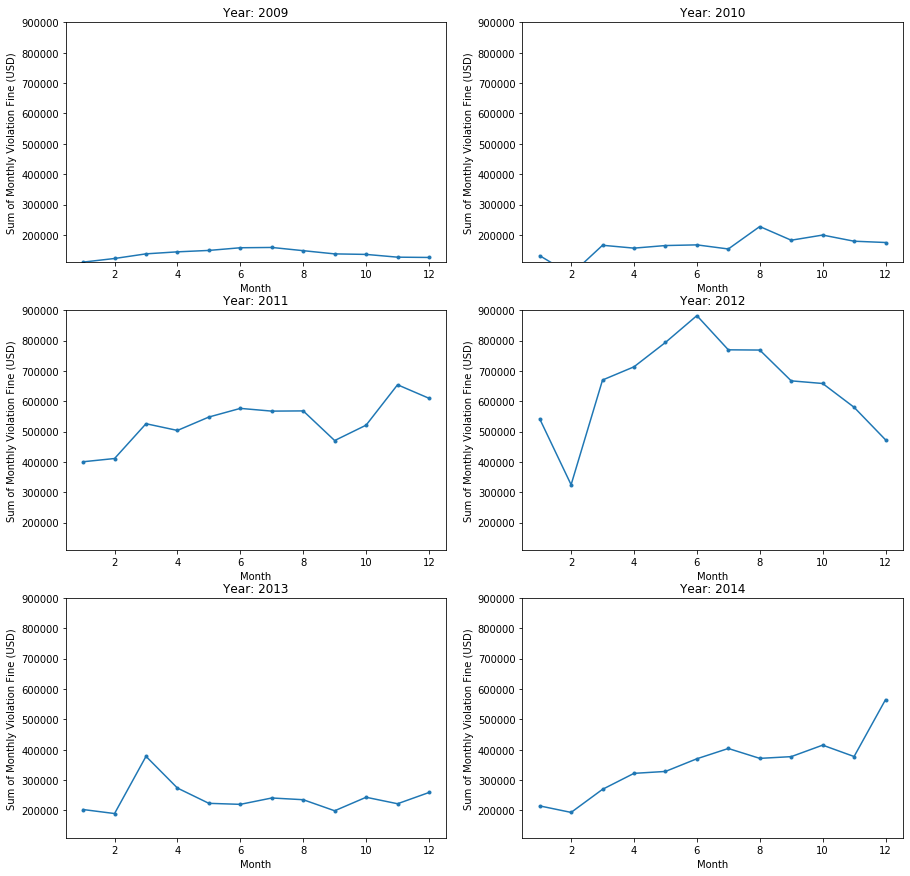

In [135]:
f, axs = plt.subplots(3,2,figsize=(15,15))
i=0
Years=range(2009, 2015)
for year in Years:
    i+=1
    cit_df_Yearly=cit_Year[cit_Year["ViolDate"].str.contains("%d"%(year))]
    
    cit_df_Yearly["ViolMonth"]=pd.to_datetime(cit_df_Yearly["ViolDate"]).dt.month
    cit_df_Monthly_Sum=[]
    months=range(1, 13)
    for month in months:
        violMonth=cit_df_Yearly.query("ViolMonth==%d"%(month))
        _sum=violMonth["ViolFine"].sum()
        cit_df_Monthly_Sum.append([month,_sum])
    cit_df_Monthly_Sum=np.array(cit_df_Monthly_Sum)
    x=cit_df_Monthly_Sum[:,0]
    y=cit_df_Monthly_Sum[:,1]
    plt.subplot(3, 2, i)
    plt.plot(x,y, '.-')
    plt.xlabel("Month")
    plt.ylabel("Sum of Monthly Violation Fine (USD)")
    plt.title("Year: %d" %(year))
    plt.ylim(110000,900000)

    

/home/ndugnel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


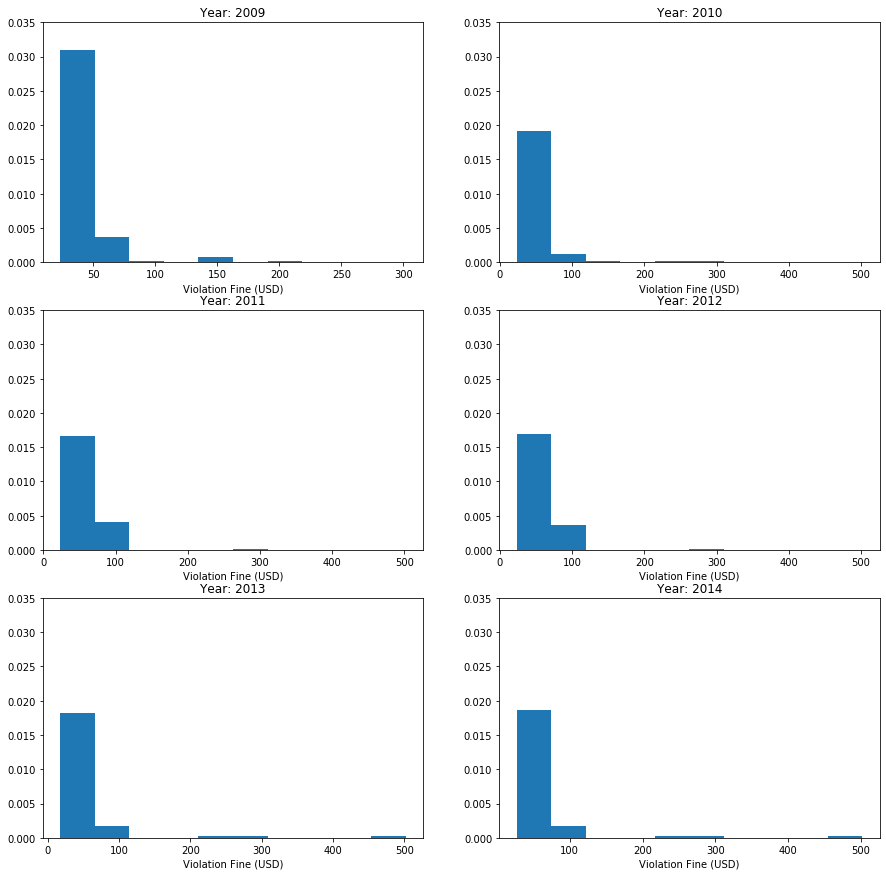

In [136]:
f, axs = plt.subplots(3,2,figsize=(15,15))
i=0
Years=range(2009, 2015)
for year in Years:
    i+=1
    cit_df_Yearly=cit_Year[cit_Year["ViolDate"].str.contains("%d"%(year))]
    
    cit_df_Yearly["ViolMonth"]=pd.to_datetime(cit_df_Yearly["ViolDate"]).dt.month
    cit_df_Monthly=cit_df_Yearly.groupby(["ViolMonth"],as_index=False).count()

    cit_df_Monthly=cit_df_Monthly[["ViolMonth","Citation", "ViolFine"]]

    
    plt.subplot(3, 2, i)
    plt.hist(cit_df_Yearly["ViolFine"], density=True, histtype="stepfilled")
    plt.xlabel("Violation Fine (USD)")
    #plt.ylabel("Sum of Monthly Violation Fine (USD)")
    plt.title("Year: %d" %(year))
    plt.ylim(0,0.035)

    

/home/ndugnel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


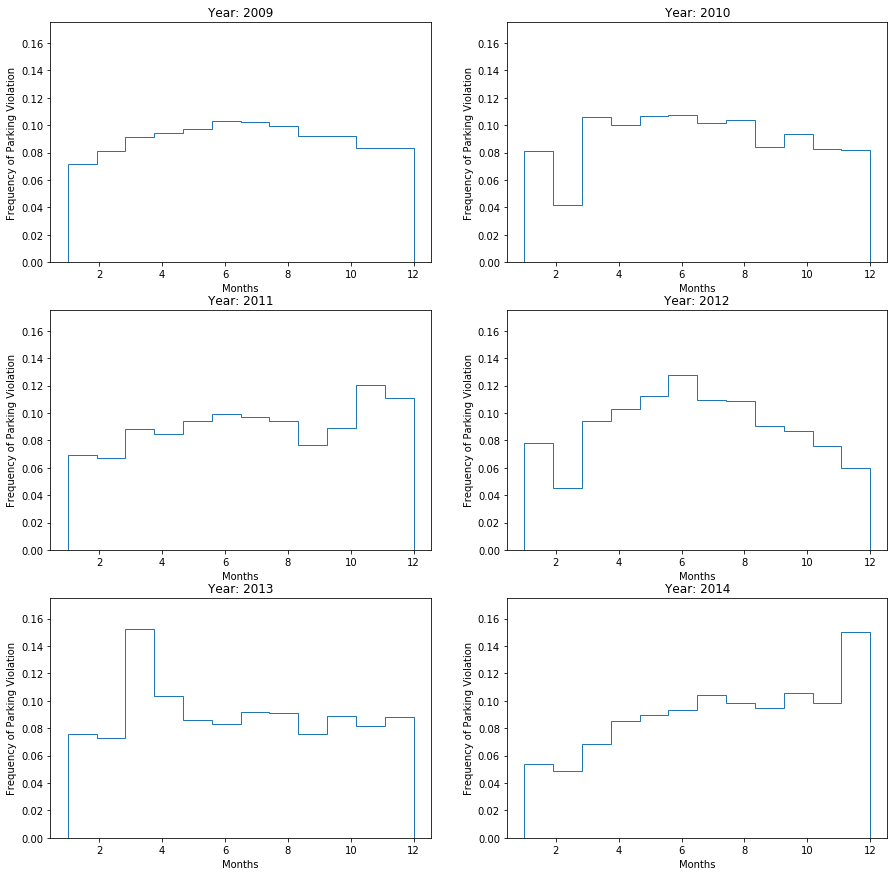

In [131]:
f, axs = plt.subplots(3,2,figsize=(15,15))
i=0
Years=range(2009, 2015)
for year in Years:
    i+=1
    cit_df_Yearly=cit_Year[cit_Year["ViolDate"].str.contains("%d"%(year))]
    
    cit_df_Yearly["ViolMonth"]=pd.to_datetime(cit_df_Yearly["ViolDate"]).dt.month
    cit_df_Monthly=cit_df_Yearly.groupby(["ViolMonth"],as_index=False).count()

    cit_df_Monthly=cit_df_Monthly[["ViolMonth","Citation", "ViolFine"]]

    
    plt.subplot(3, 2, i)
    plt.hist(cit_df_Yearly["ViolMonth"], density=True, histtype="step",bins=12)
    plt.xlabel("Months")
    plt.ylabel("Frequency of Parking Violation")
    plt.title("Year: %d" %(year))
    plt.ylim(0,0.175)

    